In [1]:
import torch
import lightning as L
from torch.utils.data import TensorDataset,DataLoader
# custom modules
from word_embedding import WordEmbeddings,WordnPositionalEmbeddings
from utils import plot_token_relations , vectorize_text, get_weights

In [2]:
input_texts = ["Roads ? Where we're going we don't need roads","It's alive! It's alive!","May the Force be with you.","Life finds a way"]

In [3]:
eos_symbol = '<eos>'
input_texts = [input_text.lower() + f' {eos_symbol}' for input_text in input_texts]

In [4]:
vocabulary = []
for text in input_texts:
    vocabulary.extend(text.split(' '))
vocabulary = list(set(vocabulary))

In [5]:
vocabulary

["it's",
 'a',
 'life',
 'way',
 'with',
 'finds',
 'we',
 'roads',
 '<eos>',
 '?',
 'force',
 'need',
 'be',
 'going',
 'where',
 "don't",
 'you.',
 'may',
 'the',
 'alive!',
 "we're"]

In [6]:
input_encodings = []
label_encodings = []
for text in input_texts:
    inputs,labels = vectorize_text(eos_symbol,text,vocabulary)
    input_encodings.extend(inputs)
    label_encodings.extend(labels)

In [7]:
len(input_encodings[0])


21

In [8]:
len(label_encodings[0])

21

In [9]:
inputs = torch.tensor(input_encodings)
labels = torch.tensor(label_encodings)
dataset = TensorDataset(inputs,labels)
dataloader = DataLoader(dataset)

In [10]:
len(vocabulary)

21

In [11]:
word_embedding = WordEmbeddings(vocab_size=len(vocabulary),network_width=2)

Pre training parameters


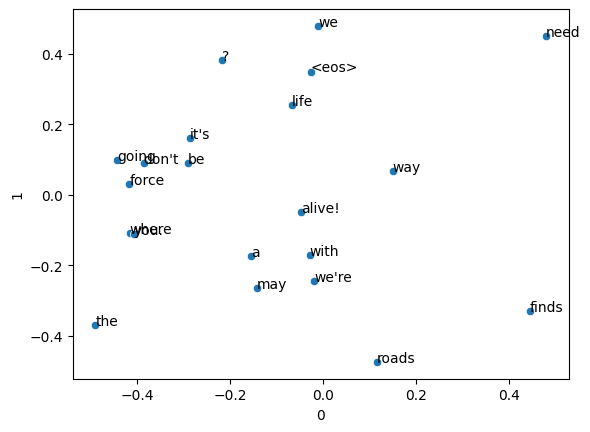

In [12]:
print('Pre training parameters')
plot_token_relations(word_embedding,vocabulary)

In [13]:
trainer = L.Trainer(max_epochs=150)
trainer.fit(word_embedding,train_dataloaders=dataloader)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name         | Type             | Params
--------------------------------------------------
0 | loss         | CrossEntropyLoss | 0     
  | other params | n/a              | 84    
--------------------------------------------------
84        Trainable params
0         Non-trainable params
84        Total params
0.000     Total estimated model params size (MB)
C:\Users\parag\.conda\envs\encoder_decoder\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
C:\Users\parag\.conda\envs\encoder_decoder\lib\site-packages\lightning\pytorch\loops\fit_loop.py:293: The number of

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=150` reached.


Post training parameters


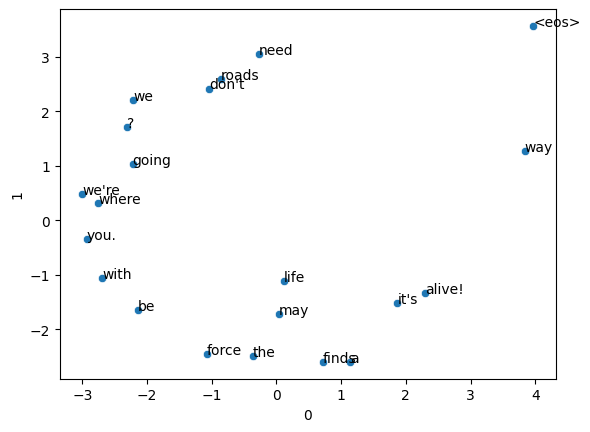

In [14]:
print('Post training parameters')
plot_token_relations(word_embedding,vocabulary)

In [15]:
weights_df = get_weights(word_embedding,vocabulary)

In [16]:
weights_df

,0,1,token
0,1.869098,-1.529633,it's
1,1.133479,-2.597922,a
2,0.111049,-1.110047,life
3,3.836430,1.270033,way
4,-2.698283,-1.055972,with
5,0.715103,-2.601790,finds
6,-2.214278,2.199875,we
7,-0.864902,2.596997,roads
8,3.969333,3.564429,<eos>
9,-2.311185,1.704758,?


# Positional encodings

In [17]:
word_n_positional_embedding = WordnPositionalEmbeddings(vocab_size=len(vocabulary),network_width=2)


In [18]:
trainer = L.Trainer(max_epochs=150)
trainer.fit(word_n_positional_embedding,train_dataloaders=dataloader)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name         | Type             | Params
--------------------------------------------------
0 | loss         | CrossEntropyLoss | 0     
  | other params | n/a              | 84    
--------------------------------------------------
84        Trainable params
0         Non-trainable params
84        Total params
0.000     Total estimated model params size (MB)
C:\Users\parag\.conda\envs\encoder_decoder\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
C:\Users\parag\.conda\envs\encoder_decoder\lib\site-packages\lightning\pytorch\loops\fit_loop.py:293: The number of

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=150` reached.


Post training with positional encoding parameters


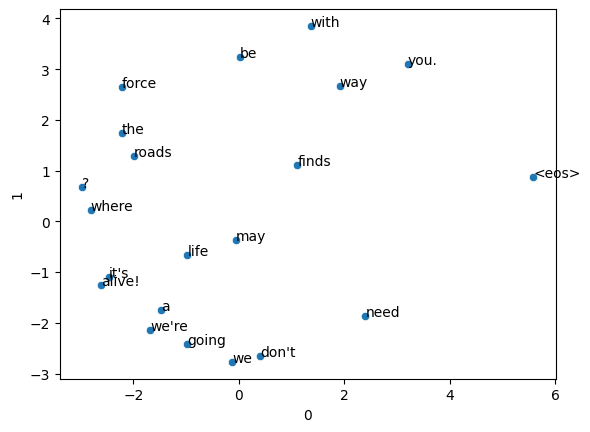

In [19]:
print('Post training with positional encoding parameters')
plot_token_relations(word_n_positional_embedding, vocabulary)